<a href="https://colab.research.google.com/github/devt-vari/devt-vari/blob/main/Gromo_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GroMo**

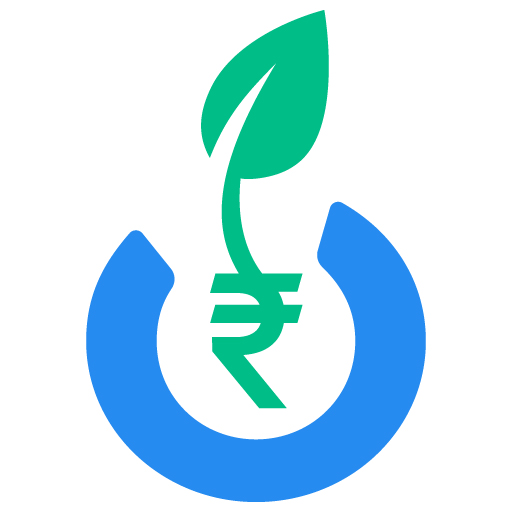

**Data Cleaning and Preparation**

In [90]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customer_data = pd.read_csv("/content/Case_Study_Customer_Data.csv")
orders_data = pd.read_csv("/content/Case_Study_Orders_Data.csv")

# Display first few rows of each dataset to understand the structure
print("Customer Data:")
print(customer_data.head())

print("\nOrders Data:")
print(orders_data.head())


Customer Data:
    Cust Id  Customer Created Date     Week     Cust Profession
0  6X894534  01 Jan, 2021 00:23:41  W1,2021     Insurance Agent
1  8WTK1802  01 Jan, 2021 01:16:11  W1,2021  Sales Professional
2  0WWO4742  01 Jan, 2021 06:19:00  W1,2021      Small Merchant
3  V4OO4168  01 Jan, 2021 06:32:11  W1,2021       Finance Agent
4  Z8EA4622  01 Jan, 2021 08:42:21  W1,2021   BFSI Professional

Orders Data:
       Order No   Cust ID     Order Date Order Status  Order Amount
0  4.258910e+18  6X894534  01/01/21 0:36        Other           NaN
1  4.258910e+18  0WWO4742  01/01/21 6:24        Other           NaN
2  4.258910e+18  V4OO4168  01/01/21 6:47        Other           NaN
3  4.258910e+18  V4OO4168  01/01/21 6:51        Other           NaN
4  4.258910e+18  Z8EA4622  01/01/21 9:02        Other           NaN


In [91]:
# Check for missing values
print("Missing values in Customer Data:")
print(customer_data.isnull().sum())

print("\nMissing values in Orders Data:")
print(orders_data.isnull().sum())

# Rename the 'Cust Id' column to 'Cust ID'
customer_data = customer_data.rename(columns={'Cust Id': 'Cust ID'})

# Convert date columns to datetime format
customer_data['Customer Created Date'] = pd.to_datetime(customer_data['Customer Created Date'])
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])


Missing values in Customer Data:
Cust Id                   0
Customer Created Date     0
Week                      0
Cust Profession          42
dtype: int64

Missing values in Orders Data:
Order No            0
Cust ID             0
Order Date          0
Order Status        0
Order Amount    25920
dtype: int64


In [92]:
# Replace missing values in 'Order Amount' column with 0
orders_data['Order Amount'].fillna(0, inplace=True)

# Verify that missing values have been replaced
print("Missing values in Orders Data after replacing with 0:")
print(orders_data['Order Amount'].isnull().sum())

Missing values in Orders Data after replacing with 0:
0


In [93]:
# Replace missing values in 'Cust Profession' column with 'Others'
customer_data['Cust Profession'].fillna('Others', inplace=True)

# Verify that missing values have been replaced
print("Missing values in Customer Data after replacing with 'Others':")
print(customer_data['Cust Profession'].isnull().sum())

Missing values in Customer Data after replacing with 'Others':
0


In [94]:
# Create new columns for month in both datasets
customer_data['Month'] = customer_data['Customer Created Date'].dt.to_period('M')
orders_data['Month'] = orders_data['Order Date'].dt.to_period('M')

**Prepare analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc**




**1. Order Data Analysis**

**a. Monthly Revenues**

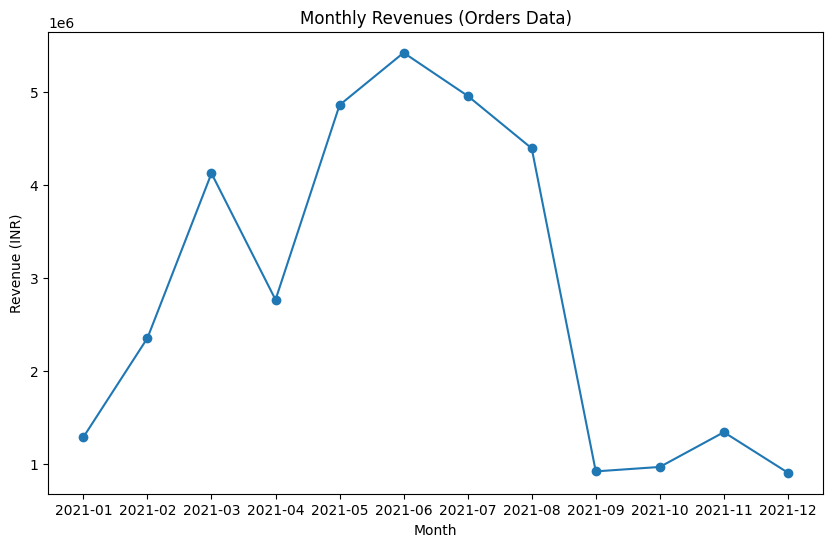

In [95]:
# Convert 'Order Date' to datetime
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

# Extract month from 'Order Date'
orders_data['Month'] = orders_data['Order Date'].dt.to_period('M')

# Calculate monthly revenues
monthly_revenues_orders = orders_data.groupby('Month')['Order Amount'].sum()

# Visualize monthly revenues
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenues_orders.index.astype(str), monthly_revenues_orders, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.title('Monthly Revenues (Orders Data)')
plt.show()

**b. Monthly Users**

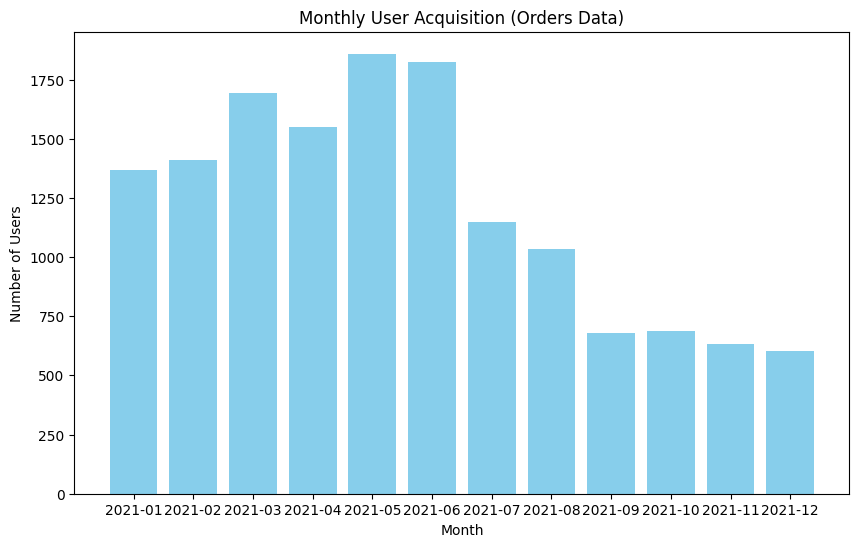

In [96]:
# Calculate the number of unique users per month
monthly_users_orders = orders_data.groupby('Month')['Cust ID'].nunique()

# Visualize monthly user acquisition
plt.figure(figsize=(10, 6))
plt.bar(monthly_users_orders.index.astype(str), monthly_users_orders, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Monthly User Acquisition (Orders Data)')
plt.show()

**c. Monthly Revenue per User**

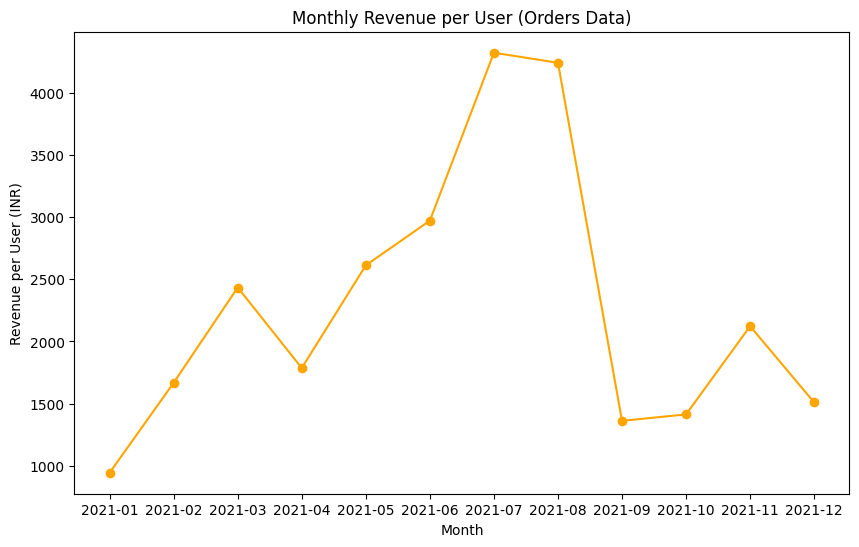

In [97]:
# Calculate monthly revenue per user
monthly_revenue_per_user_orders = monthly_revenues_orders / monthly_users_orders

# Visualize monthly revenue per user
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_per_user_orders.index.astype(str), monthly_revenue_per_user_orders, marker='o', linestyle='-', color='orange')
plt.xlabel('Month')
plt.ylabel('Revenue per User (INR)')
plt.title('Monthly Revenue per User (Orders Data)')
plt.show()

**2. Customer Data Analysis**

**a. Monthly User Acquisition**

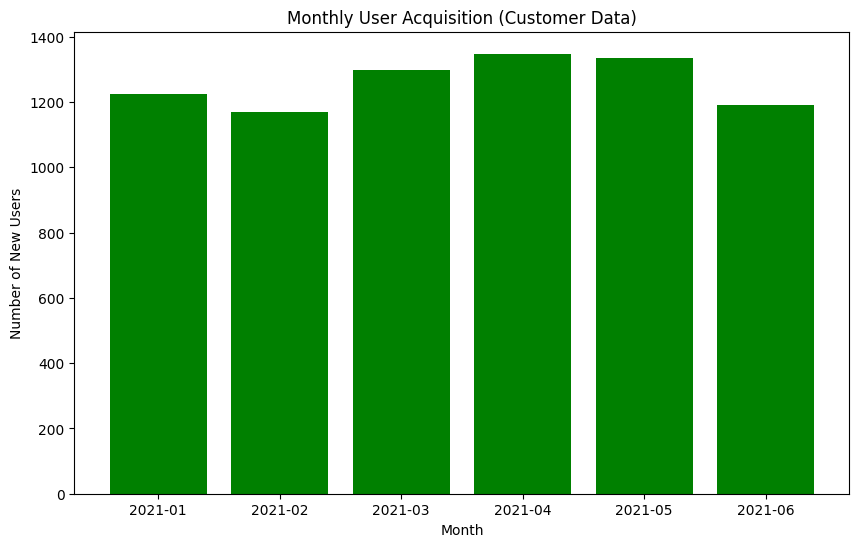

In [98]:
# Convert 'Customer Created Date' to datetime
customer_data['Customer Created Date'] = pd.to_datetime(customer_data['Customer Created Date'])

# Extract month from 'Customer Created Date'
customer_data['Month'] = customer_data['Customer Created Date'].dt.to_period('M')

# Calculate the number of new users per month
monthly_user_acquisition_customers = customer_data.groupby('Month')['Cust ID'].nunique()

# Visualize monthly user acquisition
plt.figure(figsize=(10, 6))
plt.bar(monthly_user_acquisition_customers.index.astype(str), monthly_user_acquisition_customers, color='green')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Monthly User Acquisition (Customer Data)')
plt.show()

**Prepare an analysis showing how many users placed a Purchase order, while how many actually converted bifurcated by**
*   **Month**
*   **Customer Profession**

**1. Monthly Orders and Conversions**

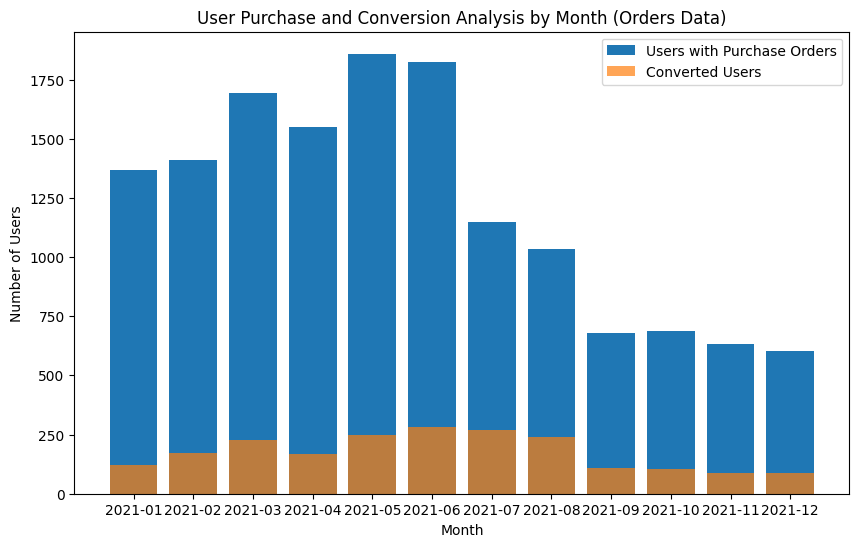

In [99]:
# Convert 'Order Date' to datetime
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

# Extract month from 'Order Date'
orders_data['Month'] = orders_data['Order Date'].dt.to_period('M')

# Calculate the number of users who placed a purchase order each month
orders_per_month = orders_data.groupby('Month')['Cust ID'].nunique()

# Calculate the number of users who converted (orders marked as 'Won') each month
converted_per_month = orders_data[orders_data['Order Status'] == 'Won'].groupby('Month')['Cust ID'].nunique()

# Calculate the conversion rate per month
conversion_rate_per_month = converted_per_month / orders_per_month * 100

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(orders_per_month.index.astype(str), orders_per_month, label='Users with Purchase Orders')
plt.bar(converted_per_month.index.astype(str), converted_per_month, label='Converted Users', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('User Purchase and Conversion Analysis by Month (Orders Data)')
plt.legend()
plt.show()


**2. Monthly User Acquisition by Profession**

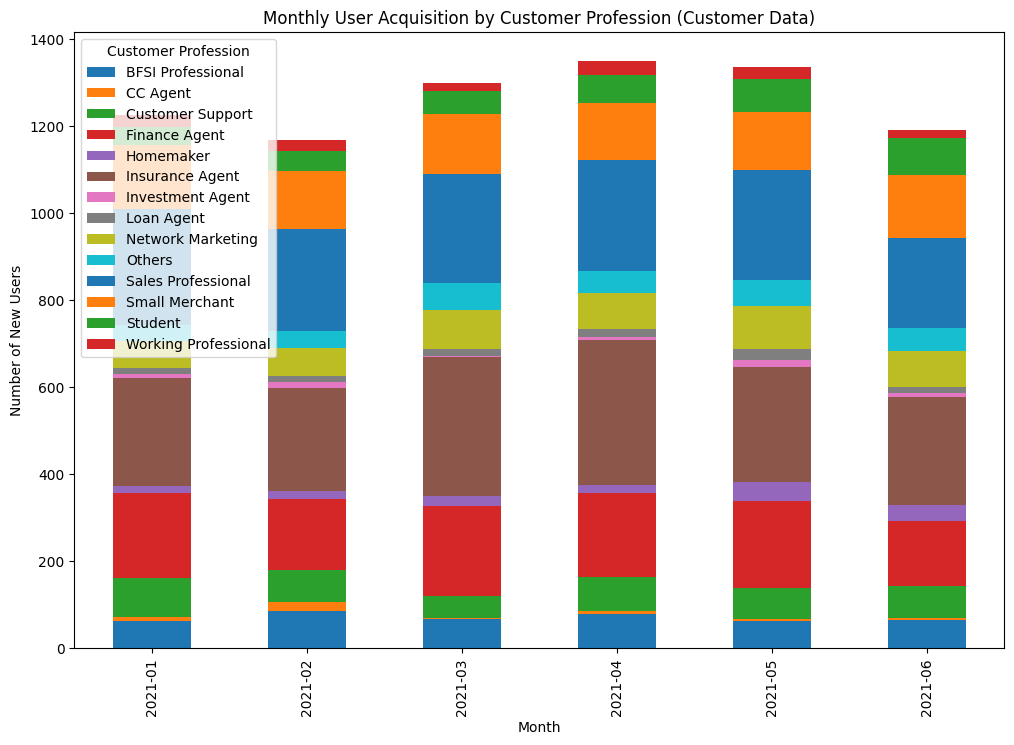

In [100]:
# Convert 'Customer Created Date' to datetime
customer_data['Customer Created Date'] = pd.to_datetime(customer_data['Customer Created Date'])

# Extract month from 'Customer Created Date'
customer_data['Month'] = customer_data['Customer Created Date'].dt.to_period('M')

# Calculate the number of new users per month, bifurcated by customer profession
user_acquisition_by_profession = customer_data.groupby(['Month', 'Cust Profession'])['Cust ID'].nunique().unstack()

# Visualize the results
user_acquisition_by_profession.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Monthly User Acquisition by Customer Profession (Customer Data)')
plt.legend(title='Customer Profession')
plt.show()


## **Cohort Analysis**

In [107]:
# Convert 'Order Date' to datetime
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

# Merge customer_data and orders_data on 'Cust ID'
merged_data = pd.merge(orders_data, customer_data, on='Cust ID')

# Extract month from 'Order Date'
merged_data['Order Month'] = merged_data['Order Date'].dt.to_period('M')

# Calculate the number of orders for each cohort and month
cohort_table = merged_data.groupby(['Cohort', 'Order Month']).size().unstack()

# Display the cohort table
print("Customer Cohort Table:")
print(cohort_table)


Customer Cohort Table:
Order Month  2021-01  2021-02  2021-03  2021-04  2021-05  2021-06  2021-07  \
Cohort                                                                       
2021-01         1930      604      464      399      472      445      409   
2021-02          178     1672      561      304      439      386      445   
2021-03          181      151     2078      548      490      472      469   
2021-04          159      150      167     1558      568      408      410   
2021-05          121      116      123      135     2256      497      389   
2021-06          186      160      154      156      152     2079      599   

Order Month  2021-08  2021-09  2021-10  2021-11  2021-12  
Cohort                                                    
2021-01          360      230      182      175      162  
2021-02          389      192      173      159      225  
2021-03          440      200      178      131      148  
2021-04          383      209      178      174      111 

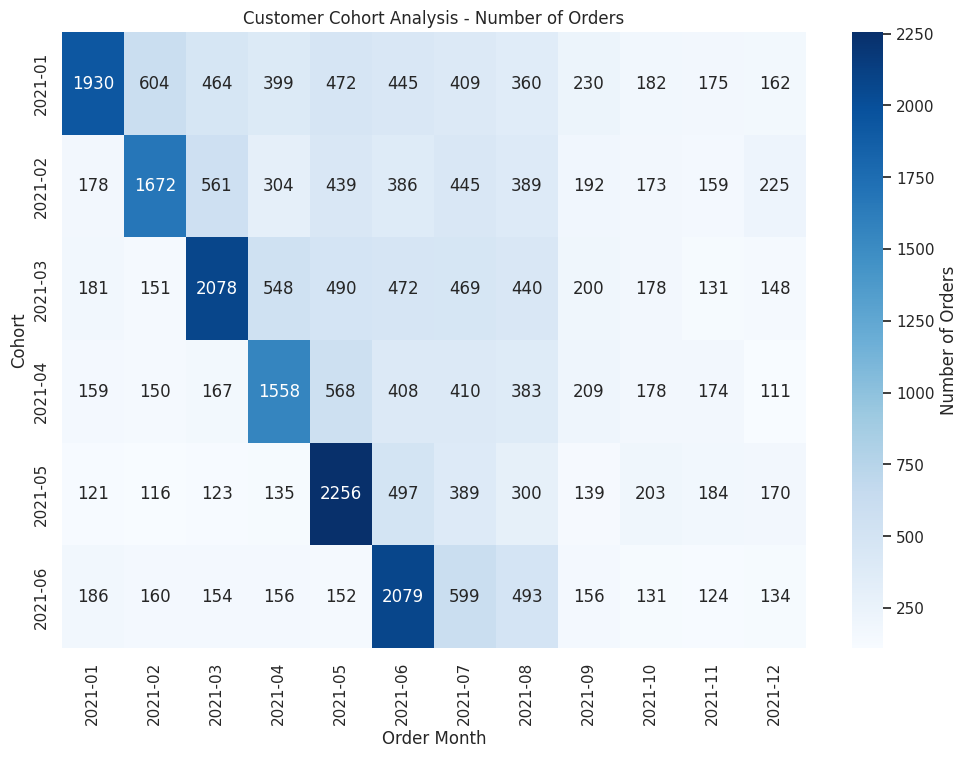

In [108]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style='white')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
plt.title('Customer Cohort Analysis - Number of Orders')
sns.heatmap(cohort_table, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Number of Orders'})
plt.xlabel('Order Month')
plt.ylabel('Cohort')
plt.show()

## **Key Observations:**


1. Strong Start in January and February:

The January and February 2021 cohorts had a solid start, maintaining consistently higher order counts over several months. These cohorts are showing strong loyalty.

2. May 2021 Cohort Surge:

An interesting spike in orders occurred with the May 2021 cohort. Investigate what might have triggered this sudden increase – was there a specific campaign or event during that period?

3. Gradual Decline in Retention:

Generally, there's a gradual decline in order counts across cohorts over time. It's essential to focus on retention strategies, especially for cohorts experiencing a drop in engagement.

4. Targeted Marketing and Engagement:

Tailor marketing strategies to boost engagement for cohorts with lower retention. Consider personalized campaigns or promotions to re-engage customers.

5. Calculate Customer Lifetime Value (CLV):

Assess the long-term value of each cohort by calculating CLV. This will help prioritize resources and refine customer acquisition strategies based on the most valuable cohorts.